In [1]:
%load_ext autoreload

In [2]:
import urllib.request, urllib.error, urllib.parse
import lxml.objectify as obj
from lxml import etree
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns

## scraping the web page for the IWXXM files

In [3]:
import  utilvolc.iwxxmVAA as ixa



In [8]:
%autoreload
# scrape the website for xml files
vaac = ixa.WashingtonPage()
vaac.read()
vaac.find_xml()

In [6]:
# location of xml files stored in xlist attribute.
vaac.xlist[12]

('><em>18 Oct 2022 - </em><a href="ARCH22/FUEG/2022J181516.html">1516 UTC</a> <a href=\'',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221018_1516.xml')

In [9]:
# get all files for Fuego
vaac.get_xml_list(vname='FUEG')

['https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221019_2023.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221019_2023.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221019_1434.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221019_0856.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221019_0308.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221018_2109.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221018_1516.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221018_0932.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221018_0408.xml',
 'https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX22_20221017_2237.xml',


In [10]:
# create list of all xml files.
flist = vaac.get_xml_list(vname=None)

## loading one file

In [15]:
xfile = ixa.iwxxmFile(flist[0])
vobj = ixa.iwxxmVAA(fstr = str(xfile))
print(vobj)

Issue Time (issueTime): 2022-10-19 23:10:00
VAAC name: WASHINGTON
Bulletin ID: A_LUXX24KNES192310_C_KNES_20221019231236.xml
name : SANGAY
volcanoID : 352090
position : -2.000 -78.333
latitude : -2.0
longitude : -78.333
eruptionDate : 2022-10-19 23:10:00
elevation : 17159.0
elevation units : {'uom': '[ft_i]'}
eruptionDetails : NEW LARGER VA EM.
informationSource : GOES-16. WEBCAM. NWP MODELS.
Observation ---------------------------
date : 2022-10-19 22:50:00
directionOfMotion : {'value': 315.0, 'uom': 'deg'}
speedOfMotion : {'value': 10.0, 'uom': '[kn_i]'}
ashCloudExtent : {'value': 210.0, 'uom': 'FL'}
exterior : [(-78.367, -1.9), (-78.4, -1.917), (-78.333, -2.0), (-78.317, -2.0), (-78.367, -1.9)]
---------------------------------------
Forecast0 -------------
date : 2022-10-20 05:00:00
ashCloudExtent : {'value': 210.0, 'uom': 'FL'}
exterior : [(-78.383, -1.9), (-78.433, -1.934), (-78.333, -2.017), (-78.333, -1.984), (-78.383, -1.9)]
Forecast1 -------------
date : 2022-10-20 11:00:00
as

## loading all the xml files

In [11]:
%autoreload
icc = ixa.iwxxmCollection()
icc.add_files(flist)

WARNING could not load https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX25_20221017_0002.xml
list index out of range
-------------------------
WARNING could not load https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX25_20221016_1805.xml
list index out of range
-------------------------
WARNING could not load https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX23_20221017_0936.xml
input strings are empty
-------------------------
WARNING could not load https://www.ospo.noaa.gov/Products/atmosphere/vaac/volcanoes/xml_files/FVXX27_20221014_1819.xml
input strings are empty
-------------------------


TEST


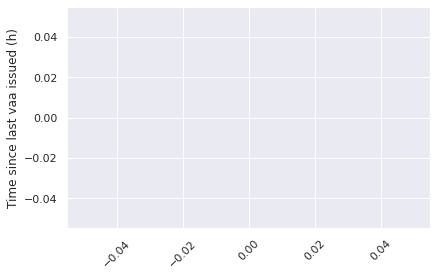

SANGAY


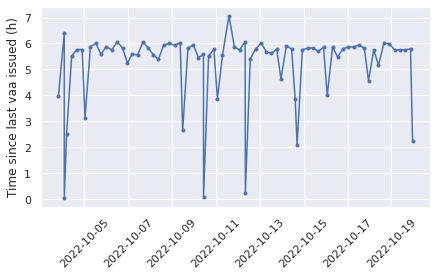

REVENTADOR


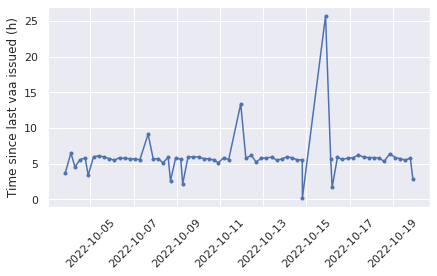

FUEGO


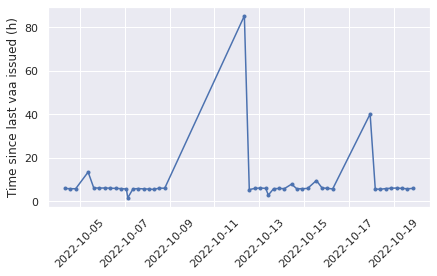

POPOCATEPETL


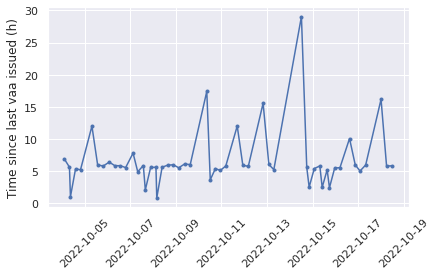

RUIZ


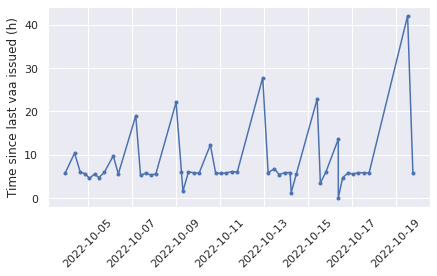

In [16]:
# plot issue frequency for each volcano
for vname in icc.get_volcano_list():
    sns.set()
    temp = ixa.create_new_collection(icc,vname)
    print(vname)
    temp.get_issue_frequency()
    plt.show()

REVENTADOR


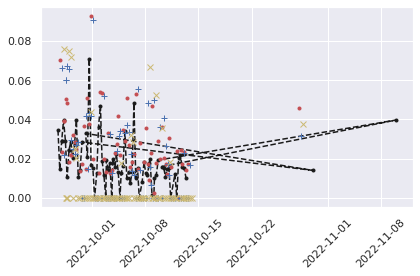

SANGAY


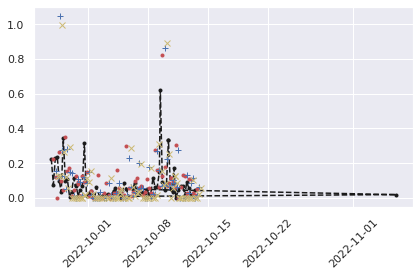

TEST


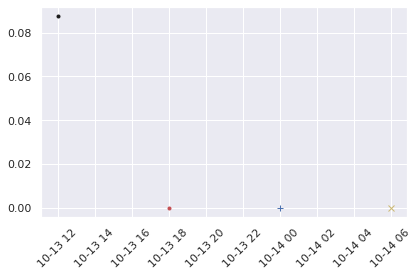

POPOCATEPETL


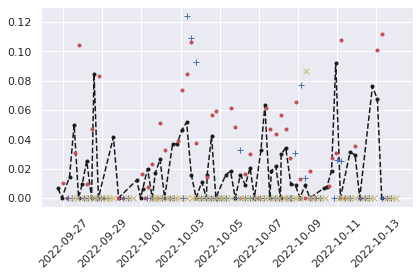

FUEGO


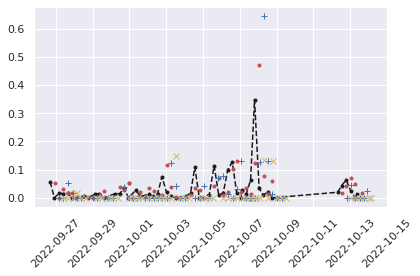

RUIZ


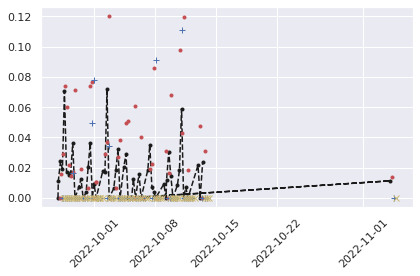

In [11]:
%autoreload
for vname in icc.get_volcano_list():
    print(vname)
    x,y = icc.time_series(vname=vname)
    plt.show()

In [12]:
%autoreload
#matches = icc.check_forecasts('FUEGO',fnum=3)

In [13]:
%autoreload
#key1 = list(matches.keys())
#key1 = key1[28]
#print(matches[key1])
#icc.plot_checks('FUEGO',key1,matches[key1],3)

In [17]:
%autoreload
# print volcanoes that VAAs are issued for
print(icc.get_volcano_list())


['TEST', 'SANGAY', 'REVENTADOR', 'FUEGO', 'POPOCATEPETL', 'RUIZ']
